# Group_Project-2

# 1.Load the required libraries and read the dataset. 

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

In [2]:
df = pd.read_csv(r'C:\Users\ayanp\Downloads\New folder\New folder\renttherunway.csv')
df.head(5)

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features

In [3]:
##Check the first few samples
df.sample(4)

,Unnamed: 0,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
175462,175462,fit,632511,34d,1625102,107lbs,10.0,party,The fit was true to size. There is no elastic...,petite,The dress was gorgeous and fit true to size. ...,dress,"5' 5""",1,33.0,"October 15, 2014"
19476,19476,small,500743,32c,1317846,110lbs,10.0,formal affair,Wore this to an army ball and got lots of comp...,NaN,Beautiful dress!,gown,"5' 4""",4,23.0,"December 5, 2017"
167515,167515,fit,582290,NaN,1459957,NaN,10.0,party,"This is a great LBD, perfect for the Holiday S...",athletic,Great LBD the Holiday Season..,dress,"5' 5""",20,39.0,"December 12, 2016"
6808,6808,small,658910,38c,1132884,178lbs,8.0,work,"It was tighter than I would have hoped, but be...",apple,Very stylish!,dress,"5' 5""",24,28.0,"May 13, 2017"


In [4]:
##Check the first few shape
df.shape

(192544, 16)

In [5]:
## check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192476 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192197 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

# 3.Check if there are any duplicate records in the dataset? If any, drop them.

In [6]:
# Checking for duplicated records
df.drop_duplicates(inplace=True)

In [7]:
len(df[df.duplicated()])

0

# 4.Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’)

In [8]:
## drop columns id review
df = df.drop(['review_summary','review_text', 'item_id', 'user_id', 'review_date'],axis=1)
df.head()

,Unnamed: 0,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,fit,34d,137lbs,10.0,vacation,hourglass,romper,"5' 8""",14,28.0
1,1,fit,34b,132lbs,10.0,other,straight & narrow,gown,"5' 6""",12,36.0
2,2,fit,NaN,NaN,10.0,party,NaN,sheath,"5' 4""",4,116.0
3,3,fit,34c,135lbs,8.0,formal affair,pear,dress,"5' 5""",8,34.0
4,4,fit,34b,145lbs,10.0,wedding,athletic,gown,"5' 9""",12,27.0


# 5.Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs) 

In [257]:
df['weight'].dtypes

dtype('O')

In [258]:
df['weight'] = df['weight'].str.replace('lbs','')
df['weight'] = df['weight'].astype(float)
df['weight'].head()

0    137.0
1    132.0
2      NaN
3    135.0
4    145.0
Name: weight, dtype: float64

# 6. Check the unique categories for the column 'rented for' and group 'party: cocktail' category with 'party'.

In [9]:
# Checking unique categories in the column 'rented for':
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [10]:
df['rented for'] = df['rented for'].replace({'party: cocktail':'party'})

In [11]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

# 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype.

In [261]:
replace_dict = {"\'" : ".", " ": "", "\"": ""}
df['height'] = pd.to_numeric(df['height'].replace(replace_dict, regex=True))

df['height'].fillna( df['height'].median(), inplace=True )
df['height'].isna().sum()


df['height'] = df['height'].apply(lambda x: int(x) * 12) + df['height'].apply( lambda x: float( str(x).split(".")[1]) )
df['height']

0         68.0
1         66.0
2         64.0
3         65.0
4         69.0
          ... 
192539    69.0
192540    61.0
192541    68.0
192542    66.0
192543    66.0
Name: height, Length: 192544, dtype: float64

# 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods. 

In [12]:
# Checking the the missing values in all the columns
df.isnull().sum()/len(df) * 100

Unnamed: 0     0.000000
fit            0.000000
bust size      9.561970
weight        15.571506
rating         0.042588
rented for     0.005194
body type      7.601899
category       0.000000
height         0.351608
size           0.000000
age            0.498587
dtype: float64

In [13]:
categorical_columns = df.select_dtypes(include=['object']).columns

numerical_columns = df.select_dtypes(exclude=['object']).columns

for column in numerical_columns:
    df[column] = df[column].fillna(df[column].median())

for column in categorical_columns:
    df[column] = df[column].fillna(df[column].mode().iloc[0])

In [14]:
df.isnull().sum()/len(df) * 100

Unnamed: 0    0.0
fit           0.0
bust size     0.0
weight        0.0
rating        0.0
rented for    0.0
body type     0.0
category      0.0
height        0.0
size          0.0
age           0.0
dtype: float64

# 9. Check the statistical summary for the numerical and categorical columns and write your findings.

In [15]:
df.describe()

,Unnamed: 0,rating,size,age
count,192544.000000,192544.000000,192544.000000,192544.000000
mean,96271.500000,9.092758,12.245175,33.861689
std,55582.809453,1.429862,8.494877,8.039050
min,0.000000,2.000000,0.000000,0.000000
25%,48135.750000,8.000000,8.000000,29.000000
50%,96271.500000,10.000000,12.000000,32.000000
75%,144407.250000,10.000000,16.000000,37.000000
max,192543.000000,10.000000,58.000000,117.000000


In [16]:
df.describe(include='O')

,fit,bust size,weight,rented for,body type,category,height
count,192544,192544,192544,192544,192544,192544,192544
unique,3,106,190,8,7,68,24
top,fit,34b,130lbs,wedding,hourglass,dress,"5' 4"""
freq,142058,45696,44352,57794,69986,92884,28689


# 10. Are there outliers present in the column age? If yes, treat them with the appropriate method

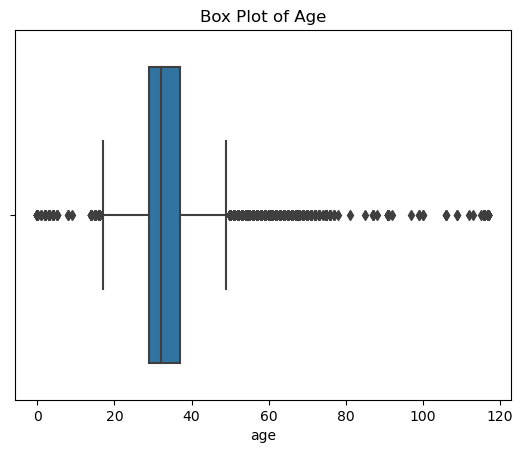

In [266]:
sns.boxplot(x='age', data=df)
plt.title('Box Plot of Age')
plt.show()

In [17]:
Q1 = df['age'].quantile(0.25)
Q2 = df['age'].quantile(0.5)
Q3 = df['age'].quantile(0.75)

IQR = Q3 - Q1

lower_range = Q1 - (1.5*IQR)
upper_range = Q3 + (1.5*IQR)

df = df.loc[(df['age'] > lower_range) & (df['age'] < upper_range)]

<Axes: >

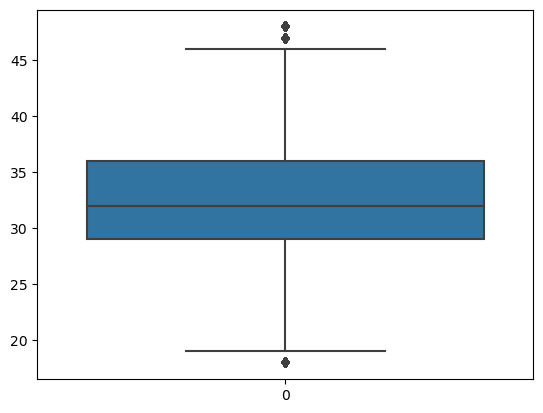

In [18]:
sns.boxplot(df['age'])

# 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot.

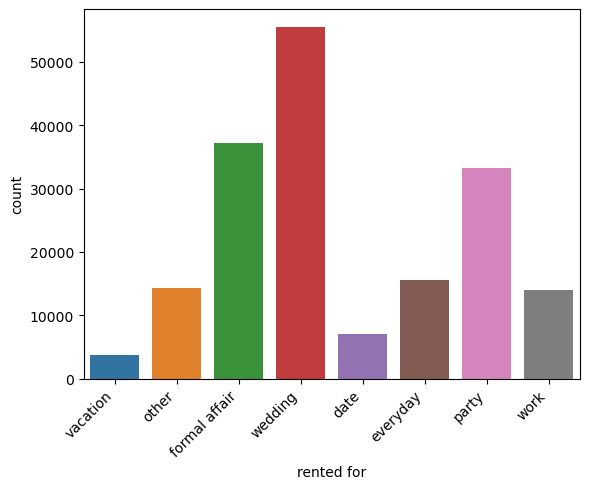

In [20]:
sns.countplot(x='rented for', data=df)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

# 12. Encode the categorical variables in the dataset.

In [21]:
dfc=df.copy()

In [22]:
df.select_dtypes('object').columns

Index(['fit', 'bust size', 'weight', 'rented for', 'body type', 'category',
       'height'],
      dtype='object')

In [43]:
# Iterating through each column with object datatype and applying label encoding
for col in df.select_dtypes('object').columns:
    # Initializing a new LabelEncoder object for each column
    le = LabelEncoder()
    # Fit-transforming the column and replacing the original values with encoded labels
    df[col] = le.fit_transform(df[col])

In [44]:
df.head()

,Unnamed: 0,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,0,0,39,37,10.0,5,3,44,16,14,28.0
1,1,0,37,32,10.0,3,6,20,14,12,36.0
3,3,0,38,35,8.0,2,4,16,13,8,34.0
4,4,0,37,45,10.0,6,1,20,17,12,27.0
5,5,0,24,38,8.0,0,1,16,16,8,45.0


# 13.	Standardize the data, so that the values are within a particular range. 

In [45]:
df1 = df.copy()

In [47]:
ss = StandardScaler()
scaled_features = ss.fit_transform(df1)
scaled_features_df = pd.DataFrame(scaled_features, index=df1.index, columns= df1.columns)
scaled_features_df.head(5)

,Unnamed: 0,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,-1.731710,-0.556736,0.019749,0.008046,0.636115,0.502722,0.016734,1.578752,1.170011,0.233744,-0.770121
1,-1.731692,-0.556736,-0.164487,-0.219445,0.636115,-0.468186,1.926154,-0.304791,0.481211,-0.004575,0.585449
3,-1.731656,-0.556736,-0.072369,-0.082950,-0.766053,-0.953639,0.653207,-0.618715,0.136811,-0.481212,0.246556
4,-1.731638,-0.556736,-0.164487,0.372033,0.636115,0.988176,-1.256213,-0.304791,1.514411,-0.004575,-0.939568
5,-1.731620,-0.556736,-1.362019,0.053545,-0.766053,-1.924547,-1.256213,-0.618715,1.170011,-0.481212,2.110466


# 14.Apply PCA on the above dataset and determine the number of PCAcomponents to be used so that 90-95% of the variance in data is explained by the same

Text(0, 0.5, 'Explained variance ratio')

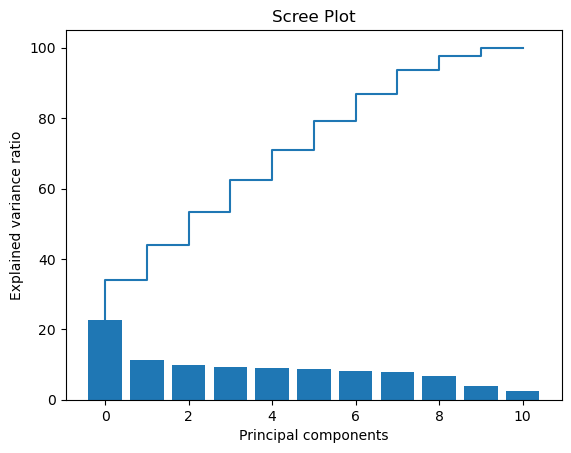

In [272]:
## covariance matrix
cov_matrix = np.cov(scaled_df.T)
cov_matrix

## Eigen values eigen vectors
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)

##Scree plot

total = sum(eig_vals)
var_exp = [(i/total)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
## Diagarm
plt.bar(range(11),var_exp)
plt.step(range(11),cum_var_exp)
plt.title('Scree Plot')
plt.xlabel("Principal components")
plt.ylabel("Explained variance ratio")

In [273]:
## Using the dimensions obtainted from the PCA to apply clustering.(i.e, 8)
pca = PCA(n_components=8)

pca_df = pd.DataFrame(pca.fit_transform(scaled_df),columns=['PC1','PC2','PC3','PC4','PC5','PC6', 'PC7', 'PC8'])
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.197036,-0.878157,0.151842,-1.387191,-1.784491,1.316281,-0.188223,-0.686714
1,-0.665168,-0.724227,0.458759,0.369383,-1.720552,-0.828711,-0.987537,-1.442100
2,0.628062,0.311242,6.066522,5.180086,-1.562046,0.718762,5.313170,-3.584236
3,-0.533785,0.176584,0.355722,0.030772,-1.689062,-1.201916,-0.261824,-0.226664
4,0.602133,-1.212275,-1.460651,-1.167656,-1.747373,0.371037,1.021899,-0.125578


# 15.Apply K-means clustering and segment the data. (You may use original data or PCA transformed data)

a. Find the optimal K Value using elbow plot for K Means clustering.

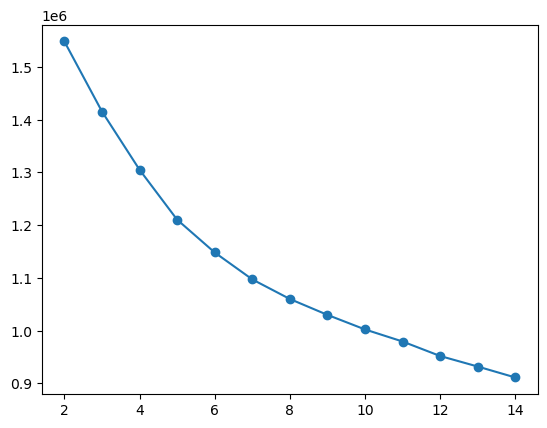

In [274]:
## Using the dimensions obtainted from the PCA to apply clustering.(i.e, 8)

## finding optimal K value by KMeans clustering using Elbow plot.
cluster_errors = []
cluster_range = range(2,15)
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)
cluster_df = pd.DataFrame({'num_clusters':cluster_range,'cluster_errors':cluster_errors})
plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'],marker='o')

b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.

In [275]:
## Applying KMeans clustering for the optimal number of clusters obtained above.
kmeans = KMeans(n_clusters=3, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=3, random_state=100)

In [276]:
## creating a dataframe of the labels.
label = pd.DataFrame(kmeans.labels_,columns=['Label'])
## joining the label dataframe to the pca_df dataframe.
kmeans_df = pca_df.join(label)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Label
0,0.197036,-0.878157,0.151842,-1.387191,-1.784491,1.316281,-0.188223,-0.686714,1
1,-0.665168,-0.724227,0.458759,0.369383,-1.720552,-0.828711,-0.987537,-1.442100,1
2,0.628062,0.311242,6.066522,5.180086,-1.562046,0.718762,5.313170,-3.584236,2
3,-0.533785,0.176584,0.355722,0.030772,-1.689062,-1.201916,-0.261824,-0.226664,1
4,0.602133,-1.212275,-1.460651,-1.167656,-1.747373,0.371037,1.021899,-0.125578,1


In [277]:
# Clustered labels from K-means clustering

kmeans_df['Label'].value_counts()

Label
1    100773
2     54690
0     37081
Name: count, dtype: int64

<Axes: xlabel='PC1', ylabel='PC2'>

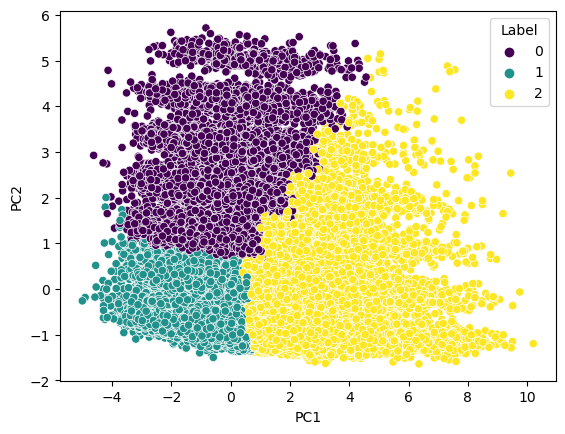

In [278]:
sns.scatterplot(x='PC1', y='PC2', data=kmeans_df, hue='Label', palette='viridis')

# 16.	Apply Agglomerative clustering and segment the data. (You may useoriginal data or PCA transformed data) 

In [48]:
df2 = scaled_features_df.head(5000)
df2.head()

,Unnamed: 0,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,-1.731710,-0.556736,0.019749,0.008046,0.636115,0.502722,0.016734,1.578752,1.170011,0.233744,-0.770121
1,-1.731692,-0.556736,-0.164487,-0.219445,0.636115,-0.468186,1.926154,-0.304791,0.481211,-0.004575,0.585449
3,-1.731656,-0.556736,-0.072369,-0.082950,-0.766053,-0.953639,0.653207,-0.618715,0.136811,-0.481212,0.246556
4,-1.731638,-0.556736,-0.164487,0.372033,0.636115,0.988176,-1.256213,-0.304791,1.514411,-0.004575,-0.939568
5,-1.731620,-0.556736,-1.362019,0.053545,-0.766053,-1.924547,-1.256213,-0.618715,1.170011,-0.481212,2.110466


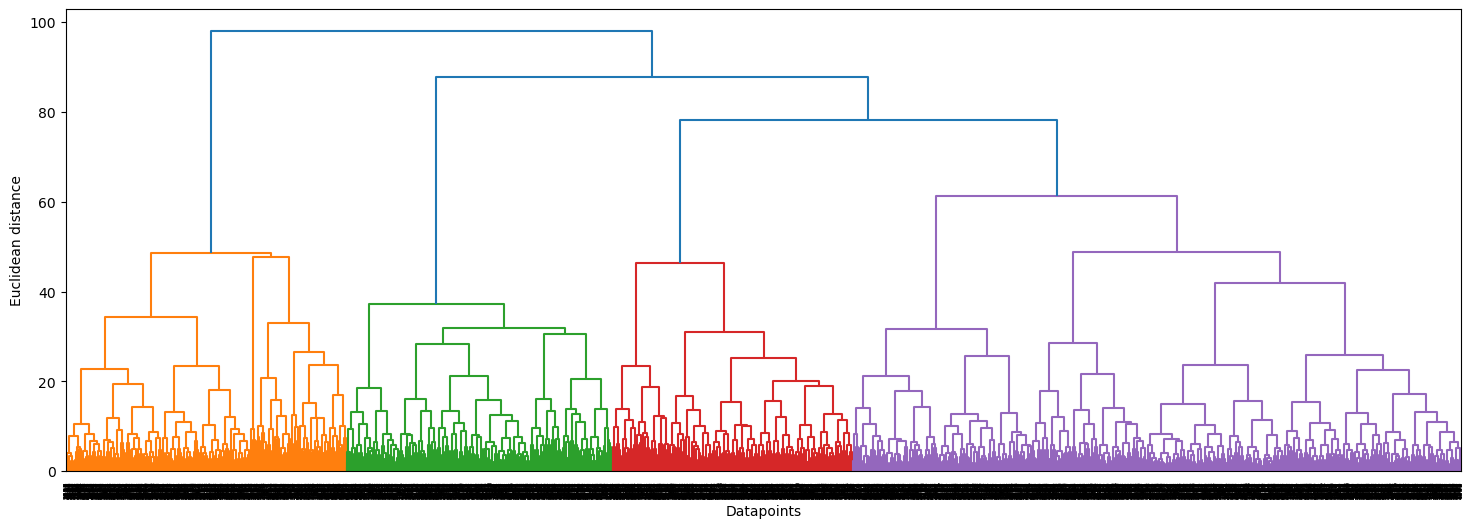

In [49]:
# Drawing the dendrogram for Agglomerative clustering
plt.figure(figsize=[18,6])
merge = linkage(df2, method='ward')
dendrogram(merge, leaf_rotation = 90)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

b.	Build a Agglomerative clustering model using the obtained optimal Kvalue observed from dendrogram

In [51]:
hie_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(df2)

In [54]:
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head()

,Labels
0,2
1,0
2,0
3,0
4,0


In [56]:
df_hier = df_cleaned.join(df_label1)
df_hier.head()

,Unnamed: 0,fit,bust size,weight,rating,rented for,body type,category,height,size,age,Labels
0,0,fit,34d,137lbs,10.0,vacation,hourglass,44,16,14,28.0,2.0
1,1,fit,34b,132lbs,10.0,other,straight & narrow,20,14,12,36.0,0.0
3,3,fit,34c,135lbs,8.0,formal affair,pear,16,13,8,34.0,0.0
4,4,fit,34b,145lbs,10.0,wedding,athletic,20,17,12,27.0,0.0
5,5,fit,32b,138lbs,8.0,date,athletic,16,16,8,45.0,0.0


c. Compute silhouette score for evaluating the quality of the Agglomerative clustering technique. (Hint: Take a sample of the dataset for agglomerative clustering to reduce the computational time)

In [59]:
for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(df2)
    labels = hier.fit_predict(df2)
    print(i,silhouette_score(df2,labels))

2 0.13591869544224847
3 0.11924731132843308
4 0.11496240781010543
5 0.07070709527191357
6 0.054968852928181516
7 0.0534313033429466
8 0.05858270121088085
9 0.06473351370550372
10 0.04106323307005182
11 0.04518975859051279
12 0.04599858038382269
13 0.04950661696839403
14 0.05389687109431641


# 17.) Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results.

In [60]:
df_hier.head()

,Unnamed: 0,fit,bust size,weight,rating,rented for,body type,category,height,size,age,Labels
0,0,fit,34d,137lbs,10.0,vacation,hourglass,44,16,14,28.0,2.0
1,1,fit,34b,132lbs,10.0,other,straight & narrow,20,14,12,36.0,0.0
3,3,fit,34c,135lbs,8.0,formal affair,pear,16,13,8,34.0,0.0
4,4,fit,34b,145lbs,10.0,wedding,athletic,20,17,12,27.0,0.0
5,5,fit,32b,138lbs,8.0,date,athletic,16,16,8,45.0,0.0


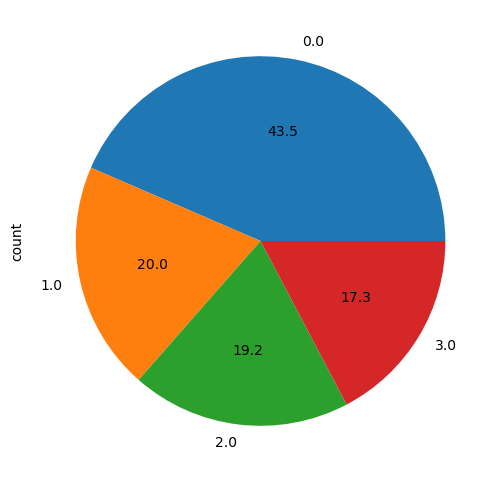

In [61]:
plt.figure(figsize=(6, 6))
df_hier['Labels'].value_counts().plot(kind='pie', autopct='%0.1f')
plt.show()